gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Skewness in the dataset:
 tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64


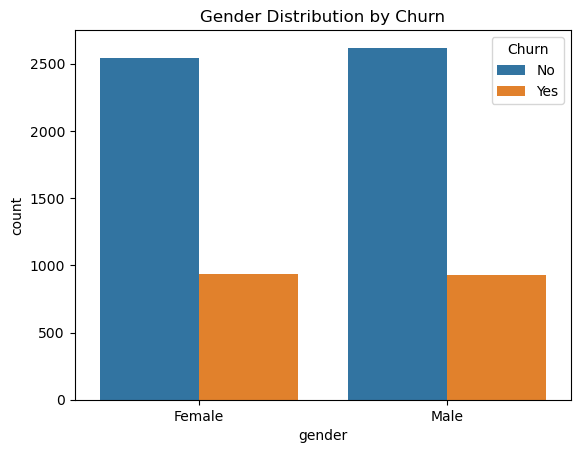

Churn distribution in the dataset:
 Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  TotalCharges_log  \
0              0 -1.280248       -1.161694     -0.994194          3.429137   
1              0  0.064303       -0.260878     -0.173740          7.544597   
2              0 -1.239504       -0.363923     -0.959649          4.692723   
3              0  0.512486       -0.747850     -0.195248          7.518471   
4              0 -1.239504        0.196178     -0.940457          5.028148   

   MonthlyCharges_log  gender_Male  Partner_Yes  Dependents_Yes  \
0            3.429137        False         True           False   
1            4.059581         True        False           False   
2            4.004602         True        False           False   
3            3.768153         True        False           False   
4            4.272491        False        False           False   

   PhoneService_Yes  

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 

# Loading the dataset
file_path = r'C:\nexford -\capstone\m4 work\teleconnect.csv'
df = pd.read_csv(file_path)

# Drop irrelevant columns
df = df.drop(columns=['customerID'], errors='ignore')

# Handling missing values in 'TotalCharges'
# Converting 'TotalCharges' column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Removing rows where 'TotalCharges' is missing (NaN)
df = df.dropna(subset=['TotalCharges'])

# Checking for any other missing values in the dataset
print(df.isnull().sum())

# Checking for skewness in numerical features
skewness = df[['tenure', 'MonthlyCharges', 'TotalCharges']].skew()
print("Skewness in the dataset:\n", skewness)

# If skewness is detected, normalize
df['TotalCharges_log'] = np.log1p(df['TotalCharges'])
df['MonthlyCharges_log'] = np.log1p(df['MonthlyCharges'])

# Encoding categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Scaling numerical features
scaler = StandardScaler()
df_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(
    df_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']]
)

# Creating a new feature 'TotalSpend' as tenure * MonthlyCharges
df_encoded['TotalSpend'] = df_encoded['tenure'] * df_encoded['MonthlyCharges']

# Data Bias Detection - Visualizing bias in the data
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Gender Distribution by Churn')
plt.show()

# Checking for imbalance in the target variable (Churn)
churn_distribution = df['Churn'].value_counts(normalize=True)
print("Churn distribution in the dataset:\n", churn_distribution)

# Splitting data into training and testing sets for further analysis (data preparation only)
X = df_encoded.drop(columns=['Churn_Yes'])  # Drop the target column for features
y = df_encoded['Churn_Yes']  

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying SMOTE to handle class imbalance in the training set (if needed for data preparation)
smote = SMOTE(random_state=42)

# Fitting SMOTE on the training data to balance the classes
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Saving the cleaned and enhanced dataset to a valid local directory
cleaned_file_path = r'C:\nexford -\capstone\m4 work\revised_cleaned_telco_data.csv'
df_encoded.to_csv(cleaned_file_path, index=False)

# Displaying the first few rows of the cleaned dataset
print(df_encoded.head())

1. Missing Values:
- There are no missing values across all columns. This confirms that the cleaning process handled missing data effectively.

2. Skewness:
- tenure: Slightly skewed at 0.237 within an acceptable range.
- MonthlyCharges: Slight negative skew at -0.222 is also minimal and does not require correction.
- TotalCharges: Right skewed at 0.961 but this has been addressed with the log transformation (TotalCharges_log).

3. Churn Distribution:
- The churn distribution is imbalanced with approximately 73.4% of customers not churning and 26.6% churning.
- This confirmed the need for balancing which was addressed with SMOTE.

4. Cleaned and Transformed Data:
- Categorical variables have been successfully encoded.
- New features like TotalSpend (calculated from tenure * MonthlyCharges) have been added.
- Log transformations have been applied to TotalCharges and MonthlyCharges to reduce skewness.